# A Jupyter Notebook to Explore the Diabetes Dataset
This notebook provides an exploratory data analysis (EDA) of the diabetes dataset. It includes loading the dataset, inspecting its structure, cleaning the data, generating statistical summaries, and visualizing relationships between variables.

## Load the Dataset
Use pandas to load the dataset from the provided CSV file.

In [2]:
# Load the dataset
import pandas as pd

# Load the diabetes dataset from the provided CSV file
file_path = r"d:\Chromedownload\diabetes.csv"
diabetes_df = pd.read_csv(file_path)

# Display a confirmation message
print("Dataset loaded successfully!")

Dataset loaded successfully!


## Inspect the Dataset
Display the first few rows, check for missing values, and inspect the data types of the columns.

In [3]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(diabetes_df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(diabetes_df.isnull().sum())

# Inspect the data types of the columns
print("\nData types of the columns:")
print(diabetes_df.dtypes)

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values in the dataset:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Ou

## Data Cleaning
Handle missing or zero values in relevant columns and ensure the dataset is ready for analysis.

In [4]:
# Replace zero values in specific columns with NaN for cleaning
import numpy as np

columns_to_clean = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes_df[columns_to_clean] = diabetes_df[columns_to_clean].replace(0, np.nan)

# Fill missing values with the median of each column
for column in columns_to_clean:
    diabetes_df[column].fillna(diabetes_df[column].median(), inplace=True)

# Confirm the cleaning process
print("Data cleaning completed. Any remaining missing values:")
print(diabetes_df.isnull().sum())

Data cleaning completed. Any remaining missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Statistical Summary
Generate descriptive statistics for the dataset, including mean, median, and standard deviation for numerical columns.

In [5]:
# Generate descriptive statistics
print("Descriptive statistics for the dataset:")
print(diabetes_df.describe())

# Calculate additional statistics (median)
print("\nMedian values for numerical columns:")
print(diabetes_df.median())

Descriptive statistics for the dataset:


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

## Data Visualization
Create visualizations such as histograms, scatter plots, and correlation heatmaps to explore relationships between variables.

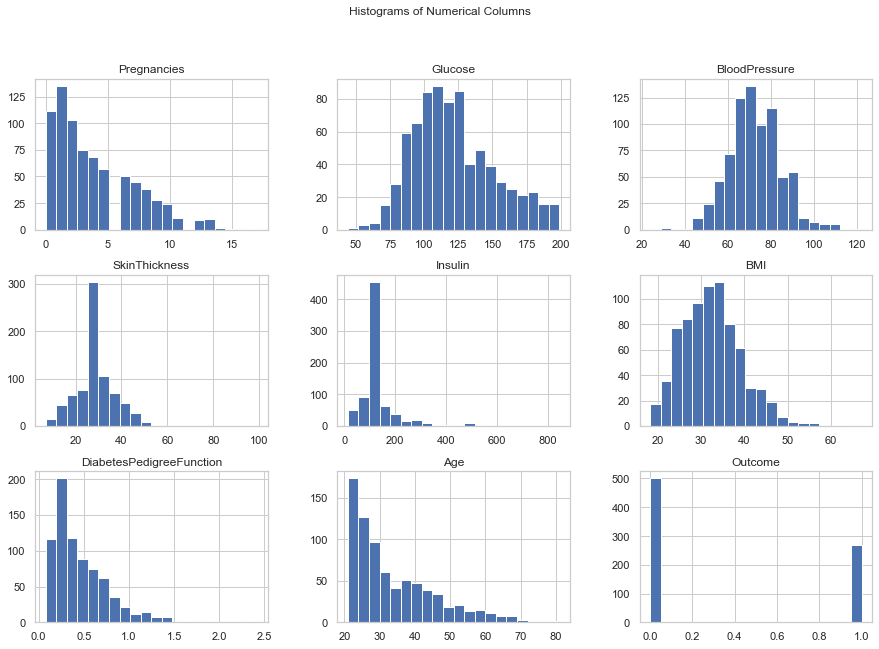

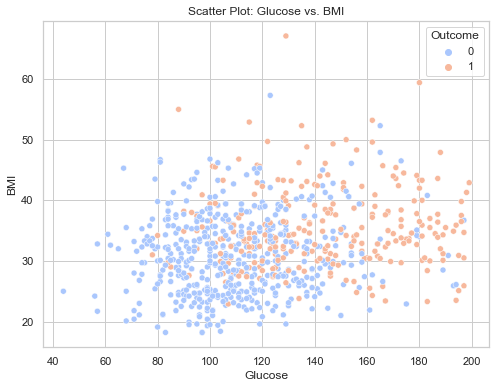

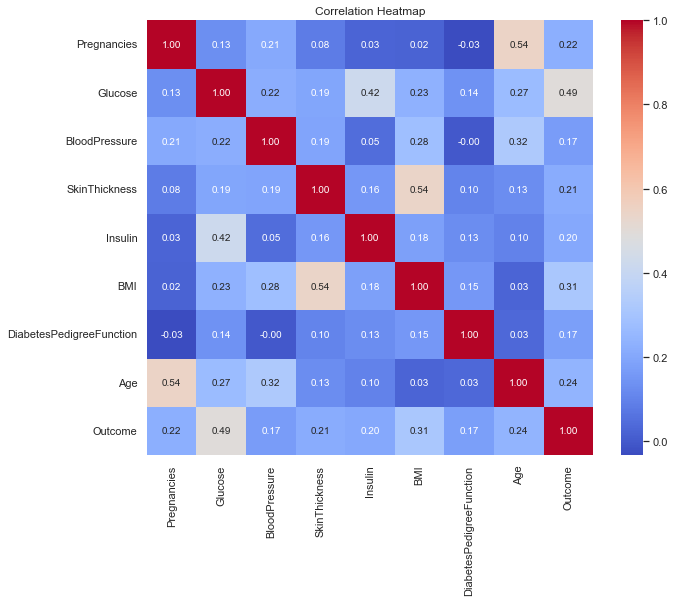

In [6]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# Create histograms for numerical columns
diabetes_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Create a scatter plot for Glucose vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=diabetes_df, palette="coolwarm")
plt.title("Scatter Plot: Glucose vs. BMI")
plt.show()

# Generate a correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = diabetes_df.drop("Outcome", axis=1)
y = diabetes_df["Outcome"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")

Data split into training and testing sets.


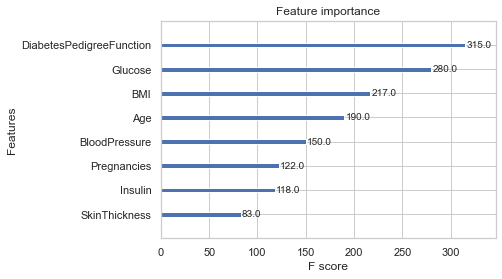

In [8]:
# Check feature importance using a simple XGBoost model
import xgboost as xgb
from xgboost import plot_importance

model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
plot_importance(model, max_num_features=10)
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [10]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 0.7540717046514727


In [11]:
# Train the final model with the best parameters
final_model = xgb.XGBClassifier(**grid_search.best_params_, random_state=42)
final_model.fit(X_train, y_train)

print("XGBoost model trained successfully.")

XGBoost model trained successfully.


Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



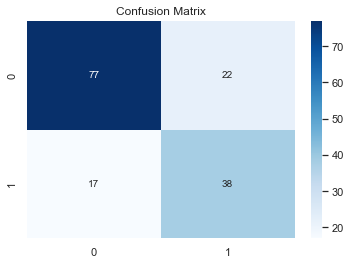

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = final_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [13]:
pip install shap


[notice] A new release of pip available: 22.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import SHAP
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(final_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

print("SHAP values calculated.")

SHAP values calculated.


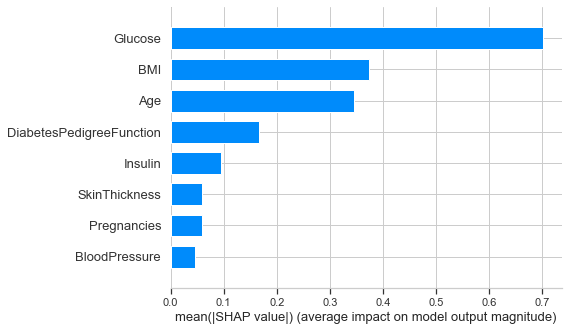

In [15]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Generate a summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

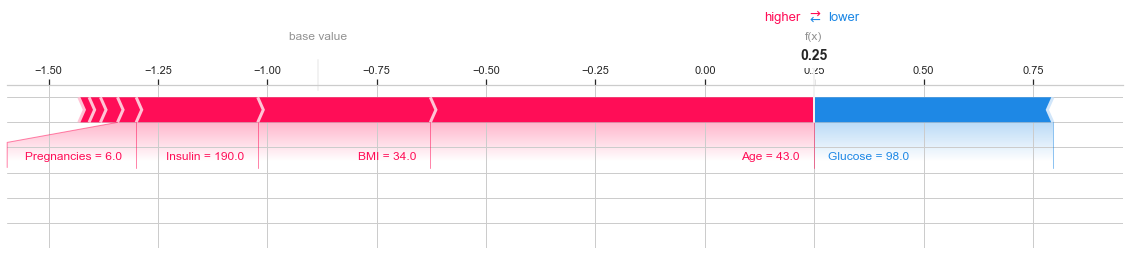

In [16]:
# Generate a force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0], matplotlib=True)

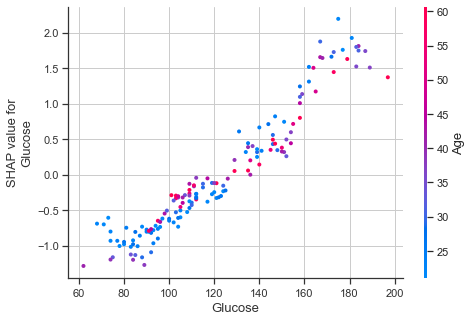

In [17]:
# Generate a dependence plot for a specific feature (e.g., 'Glucose')
shap.dependence_plot("Glucose", shap_values.values, X_test)

d:\Python39\lib\site-packages\shap\plots\_beeswarm.py:736: UserWarning: Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
  pl.xlim((slow, shigh))
d:\Python39\lib\site-packages\shap\plots\_beeswarm.py:756: UserWarning: Attempting to set identical left == right == -0.0 results in singular transformations; automatically expanding.
  pl.xlim((slow, shigh))


<Figure size 432x288 with 0 Axes>

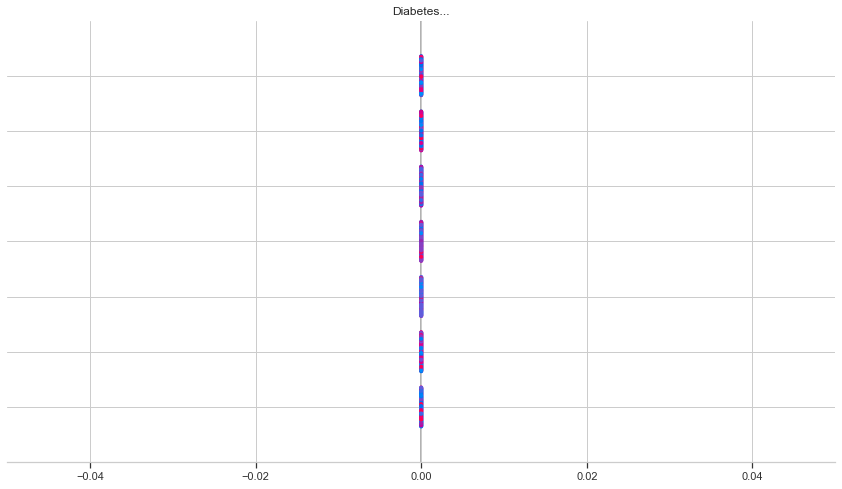

In [18]:
# Calculate SHAP interaction values
shap_interaction_values = explainer.shap_interaction_values(X_test)

# Generate an interaction summary plot
shap.summary_plot(shap_interaction_values, X_test)

AUC-ROC Score: 0.7343434343434343


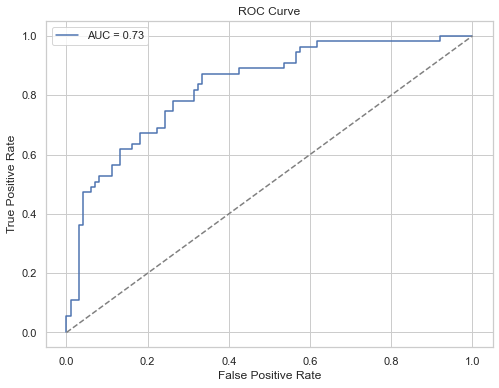

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [20]:
# Identify misclassified samples
misclassified = X_test[y_test != y_pred]
print("Misclassified samples:")
print(misclassified)

Misclassified samples:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6     98.0           58.0           33.0    190.0  34.0   
473            7    136.0           90.0           29.0    125.0  29.9   
204            6    103.0           72.0           32.0    190.0  37.7   
336            0    117.0           72.0           29.0    125.0  33.8   
568            4    154.0           72.0           29.0    126.0  31.3   
148            5    147.0           78.0           29.0    125.0  33.7   
667           10    111.0           70.0           27.0    125.0  27.5   
212            7    179.0           95.0           31.0    125.0  34.2   
199            4    148.0           60.0           27.0    318.0  30.9   
356            1    125.0           50.0           40.0    167.0  33.3   
281           10    129.0           76.0           28.0    122.0  35.9   
328            2    102.0           86.0           36.0    120.0  45.5   
67             

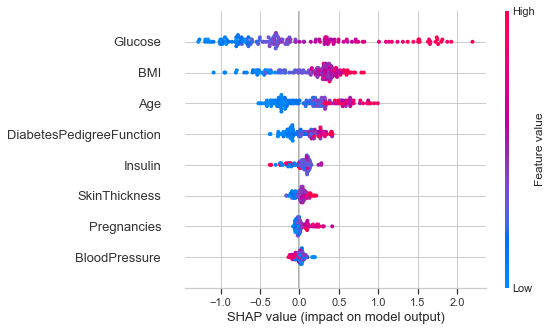

In [21]:
# SHAP summary plot (already included in your notebook)
shap.summary_plot(shap_values, X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest model
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7467532467532467


In [23]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(final_model, X, y, cv=5, scoring="accuracy")
print("Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Accuracy: 0.7682879212290977


In [24]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 3]
}

random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1
)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [25]:
pip install imblearn


[notice] A new release of pip available: 22.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [27]:
from sklearn.metrics import roc_curve

# Get predicted probabilities
y_proba = final_model.predict_proba(X_test)[:, 1]

# Find the optimal threshold
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.34225386


In [28]:
# Train the XGBoost model with the best parameters
best_params = {
    'subsample': 0.8,
    'scale_pos_weight': 2,
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.01,
    'colsample_bytree': 1.0
}

final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

print("XGBoost model trained with best parameters.")

XGBoost model trained with best parameters.


Accuracy with optimal threshold: 0.6883116883116883

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.59      0.71        99
           1       0.54      0.87      0.67        55

    accuracy                           0.69       154
   macro avg       0.72      0.73      0.69       154
weighted avg       0.77      0.69      0.69       154



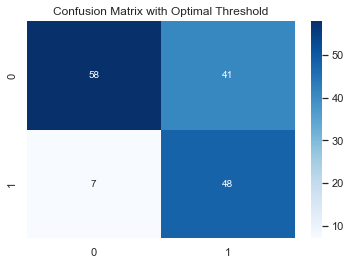

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predicted probabilities
y_proba = final_model.predict_proba(X_test)[:, 1]

# Apply the optimal threshold
optimal_threshold = 0.34225386
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

# Evaluate the model
print("Accuracy with optimal threshold:", accuracy_score(y_test, y_pred_optimal))
print("\nClassification Report:\n", classification_report(y_test, y_pred_optimal))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_optimal), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix with Optimal Threshold")
plt.show()

AUC-ROC Score: 0.8304866850321395


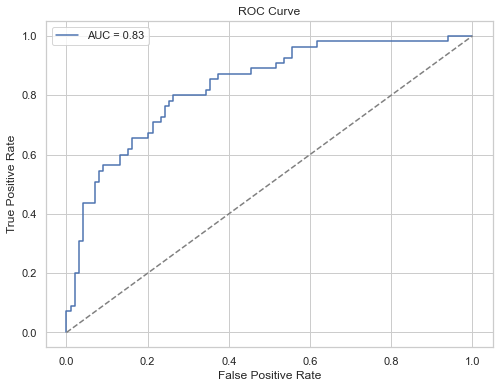

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_proba)
print("AUC-ROC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

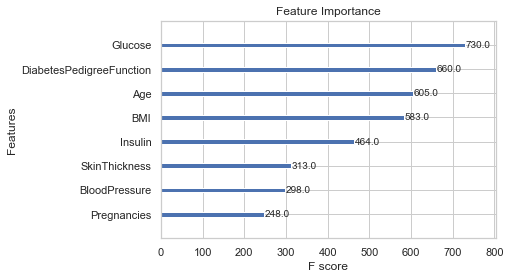

In [31]:
# Plot feature importance
plot_importance(final_model, max_num_features=10)
plt.title("Feature Importance")
plt.show()

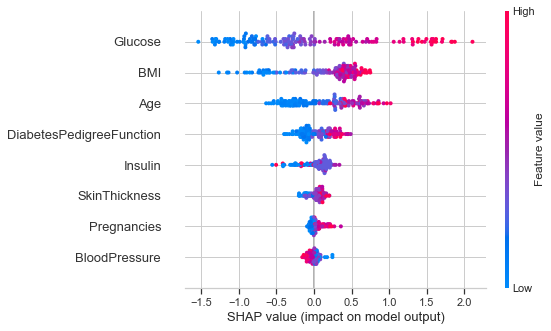

In [32]:
# Initialize the SHAP explainer
explainer = shap.Explainer(final_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Generate a summary plot
shap.summary_plot(shap_values, X_test)

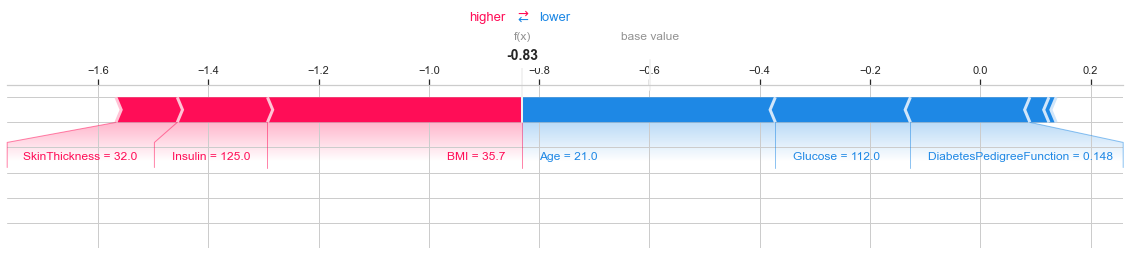

In [34]:
# Generate a force plot for a single prediction
shap.force_plot(explainer.expected_value, shap_values[1].values, X_test.iloc[1], matplotlib=True)

预测该客户患病/购买的概率为：0.00


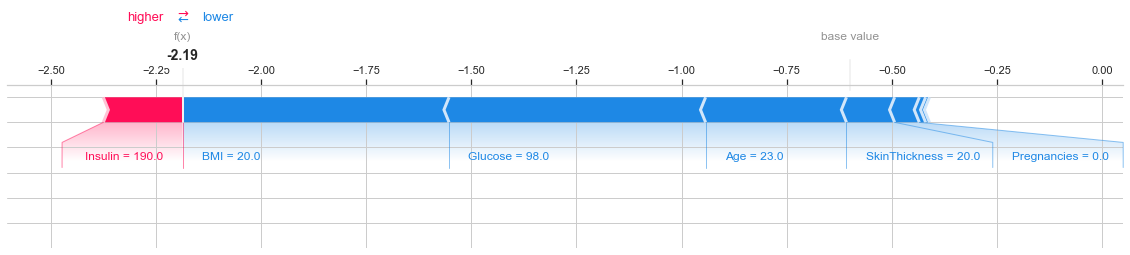

In [45]:
# 输入你自己的客户数据（注意列顺序要和X_train一样）
your_customer = pd.DataFrame([{
    "Pregnancies": 0,
    "Glucose": 98,
    "BloodPressure": 70,
    "SkinThickness": 20,
    "Insulin": 190,
    "BMI": 20.0,
    "DiabetesPedigreeFunction": 0.5,
    "Age": 23
}])

# 模型预测
pred = model.predict_proba(your_customer)[0][1]
print(f"预测该客户患病/购买的概率为：{pred:.2f}")

# 生成 SHAP 可解释图
shap_value = explainer(your_customer)
shap.plots.force(shap_value[0], matplotlib=True)
plt.show()
